Clear section headings are required. Here’s one good way to structure your report:
●Introduction
●Background (or Related Work)
●Methods
●Findings
●Discussion (or Implications)
●Conclusion
●References

#### Introduction: Why is this analysis interesting or important (to people besides you)? Does it solve a real problem or tackle an unresolved research question?

Recent discussion around United States withdrawal from the 2015 Paris Agreement around climate change has once triggred a  discussion and its impact on enviroment. This ananlyis looks at two independnt dataset plublished by United Nations on Kaggle.

This analysis is important from a viewpoint to get an indepth understanding of Green House Gas Emission and Energy Usage about few pompmint Nations. 

#### Background/Related Work: 
##### What other research has been done in this area?

There has been serveral reserch done in this area but very sepcific topic or country focuced on either GreehHouse Emision or Enrgy consumption  

Few Example  : 
* Structure and environmental impact of global energy consumption : Renewable and Sustainable Energy Reviews, Volume 38, 2014, pp. 890-902  | S. Bilgen

* Does energy consumption contribute to climate change? Evidence from major regions of the world Renewable and Sustainable Energy Reviews, Volume 36, 2014, pp. 123-134 | Ghulam Akhmat, Khalid Zaman, Tan Shukui, Faiza Sajjad


* A global review of energy consumption, CO2 emissions and policy in the residential sector (with an overview of the top ten CO2 emitting countries) Renewable and Sustainable Energy Reviews, Volume 43, 2015, pp. 843-862 | Payam Nejat, Fatemeh Jomehzadeh, Mohammad Mahdi Taheri, Mohammad Gohari, Muhd Zaimi Abd. Majid

I was only able to find one reserch paper focused on Enrgy consumption vs Green House Gas Emission

* Global estimates of energy consumption and greenhouse gas emissions by MuhammadAzhar KhanaMuhammadZahir KhanbKhalidZamancLubnaNazd http://www.sciencedirect.com/science/article/pii/S136403211300631X 

How does this research inform your hypotheses, your analysis, or your system design?

What are your hypotheses or research questions?


### Data Acqusition : 
1. International Greenhouse Gas Emissions :A global GHG inventory from 1990-2017  https://www.kaggle.com/unitednations/international-greenhouse-gas-emissions 
2. International Energy Statistics : Global energy trade & production 1990-2014 https://www.kaggle.com/unitednations/international-energy-statistics

### Data Set :
  1. International Greenhouse Gas Emissions 
    Location : \data-512-a6-FinalProject\data\international-greenhouse-gas-emissions\greenhouse_gas_inventory_data_data.csv
        
  2. International Energy Statistics  
    Location  :\data-512-a6-FinalProject\data\international-energy-statistics\all_energy_statistics.csv
 

### Data Use License : 
[Per the UNData terms of use](http://data.un.org/Host.aspx?Content=UNdataUse): all data and metadata provided on UNdata’s website are available free of charge and may be copied freely, duplicated and further distributed provided that [UNdata](http://data.un.org/Explorer.aspx) is cited as the reference.

In [8]:
## getting the data from the CSV files
import csv
import pandas as pd
from collections import OrderedDict
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

# https://stackoverflow.com/questions/21137150/format-suppress-scientific-notation-from-python-pandas-aggregation-results
pd.options.display.float_format = '{:.2f}'.format

In [3]:
# Data Source 1 : International Greenhouse Gas Emissions 
i=1
GGE_data = []
with open('data/international-greenhouse-gas-emissions/greenhouse_gas_inventory_data_data.csv', encoding="utf8") as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        GGE_data.append(row)
        #print(GGE_temp_data)
        i=i+1
print("Number of Data Point:"+ str(i))    
print("Sample Data")
#print(GGE_data[:10])
for i in range(1,5):
    print(GGE_data[i])


Number of Data Point:8408
Sample Data
['Australia', '2014', '393126.946994288', 'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent']
['Australia', '2013', '396913.93653029', 'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent']
['Australia', '2012', '406462.8477036', 'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent']
['Australia', '2011', '403705.528313991', 'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent']


In [4]:
# undertsanding the data and how many different categories exist
country_list = set()
year_list = set()
category_list = set()

with open('data/international-greenhouse-gas-emissions/greenhouse_gas_inventory_data_data.csv', encoding="utf8") as csvfile:
    reader = csv.reader(csvfile)
    file = reader
    for row in reader:
        country_list.add(row[0])
        year_list.add(row[1])
        category_list.add(row[3])    

print(len(country_list))
#print(country_list)


print(len(year_list))
#print(year_list)

print(len(category_list))
#print(category_list)

#for item in country_list:
    #print(item)

44
26
11


In this section, I am exploring as how each category has changed over years . 

In [16]:
# Data Source 1 :

yearvsemission= {}
'''{
       "1990" : {
               "emission1" : sum(emission by all countries in 1990),
               "emission2" : sum(emission by all countries in 1991),
               .................
       
       }
       
   }
''' 


for item in GGE_data:
    if(item[1]!='year'):
        yearvsemission[item[1]]= {}
        
    
print(yearvsemission)

{'2014': {}, '2013': {}, '2012': {}, '2011': {}, '2010': {}, '2009': {}, '2008': {}, '2007': {}, '2006': {}, '2005': {}, '2004': {}, '2003': {}, '2002': {}, '2001': {}, '2000': {}, '1999': {}, '1998': {}, '1997': {}, '1996': {}, '1995': {}, '1994': {}, '1993': {}, '1992': {}, '1991': {}, '1990': {}}


In [17]:
#print(yearvsemission)
for item in GGE_data:
    if(item[1]!='year'):
        temp = yearvsemission[item[1]]
        #print(temp)
        emission = item[3] 
        
           
        if(emission == 'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'):
            emission='co2'
        elif(emission =='greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent'):
            emission='ghgsWoLulucf'
        elif(emission =='greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'):
            emission='ghgs'
        elif(emission =='hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent'):
            emission='hfcs'
        elif(emission =='methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'):
            emission='ch4'
        elif(emission =='nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent'):
            emission='nf3'
        elif(emission =='nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'):
            emission='n2o'
        elif(emission =='perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent'):
            emission='pfcs'
        elif(emission =='sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent'):
            emission='sf6'
        else:
            emission='hfcsPfcs'
            
        if emission in temp:
            temp[emission] += float(item[2])
        else:
            temp[emission] = float(item[2])
        yearvsemission[item[1]] = temp

#print(yearvsemission)


In [18]:
# Data Arranged for Total GreenHouse Gas Emission Category Vs Year 
yearvsemission_Gas = pd.DataFrame(yearvsemission)
yearvsemission_Gas

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
ch4,3745046.10,3634010.01,3505710.29,3404185.50,3314308.11,3274318.70,3242040.14,3187988.74,3126880.49,3086476.71,...,3064061.39,3056149.78,3051411.36,3035081.96,2968151.51,2958962.91,2952669.97,2949792.51,2932934.26,2927075.80
co2,19581337.26,19186341.41,18571773.11,18331101.11,18145892.42,18259887.25,18619411.07,18467809.67,18423934.19,18430210.99,...,19352492.99,19369244.66,19440145.35,18967697.28,17580588.38,18199527.03,17913267.94,17654773.98,17582508.41,17209500.55
ghgs,25241156.40,24662897.42,23862660.96,23489183.19,23195486.41,23328958.80,23688391.04,23473699.93,23357422.30,23201292.91,...,24036581.81,24046082.31,24139440.87,23625388.24,22132773.73,22772905.03,22493990.99,22243572.50,22166236.16,21803409.40
ghgsWoLulucf,24063245.61,23489518.56,22701110.39,22362340.35,22067253.73,22207711.10,22536339.89,22332085.99,22230900.39,22072138.21,...,22847983.88,22871294.60,22963865.37,22498683.66,21111361.95,21751617.75,21516717.91,21257892.34,21222170.66,20907015.89
hfcs,158805.27,153987.52,158714.19,154779.35,169206.25,201551.93,221610.54,251987.80,277584.40,260286.22,...,305224.77,319144.06,345487.86,369473.44,374770.86,407806.42,420021.67,438664.26,453782.41,472861.18
hfcsPfcs,11704.65,11040.35,11018.71,11018.21,11567.99,13311.22,11886.22,12321.73,12687.65,12491.45,...,7700.98,7740.17,7727.78,8566.00,9583.19,8494.68,8531.83,8948.59,9380.62,9753.79
n2o,1556359.51,1494172.42,1445218.64,1417992.03,1386908.65,1407812.71,1422482.93,1393821.98,1368095.63,1279029.59,...,1222363.83,1215053.62,1221696.62,1180266.37,1149591.56,1146164.21,1145150.60,1137160.40,1135355.01,1138728.79
nf3,128.69,132.10,135.86,162.95,207.91,373.29,425.82,477.57,526.32,525.96,...,2058.07,2077.02,2111.24,2066.99,1798.47,2179.13,2491.04,2074.33,2098.53,1470.39
pfcs,115166.25,109225.98,95962.47,95226.96,92297.41,94519.87,93336.43,89011.21,82658.66,76289.09,...,43533.02,39409.62,37308.59,31652.06,21681.55,22833.79,24989.45,22697.50,22625.74,20703.19
sf6,72608.68,73987.63,74127.69,74717.09,75097.66,77183.82,77197.88,70281.23,65054.96,55982.89,...,39146.76,37263.38,33552.06,30584.15,26608.21,26936.87,26868.50,29460.92,27551.19,23315.71


In [19]:
# Data Arranged as Year Vs Category 
yearvsemission_year = yearvsemission_Gas.T
yearvsemission_year

,ch4,co2,ghgs,ghgsWoLulucf,hfcs,hfcsPfcs,n2o,nf3,pfcs,sf6
1990,3745046.10,19581337.26,25241156.40,24063245.61,158805.27,11704.65,1556359.51,128.69,115166.25,72608.68
1991,3634010.01,19186341.41,24662897.42,23489518.56,153987.52,11040.35,1494172.42,132.10,109225.98,73987.63
1992,3505710.29,18571773.11,23862660.96,22701110.39,158714.19,11018.71,1445218.64,135.86,95962.47,74127.69
1993,3404185.50,18331101.11,23489183.19,22362340.35,154779.35,11018.21,1417992.03,162.95,95226.96,74717.09
1994,3314308.11,18145892.42,23195486.41,22067253.73,169206.25,11567.99,1386908.65,207.91,92297.41,75097.66
1995,3274318.70,18259887.25,23328958.80,22207711.10,201551.93,13311.22,1407812.71,373.29,94519.87,77183.82
1996,3242040.14,18619411.07,23688391.04,22536339.89,221610.54,11886.22,1422482.93,425.82,93336.43,77197.88
1997,3187988.74,18467809.67,23473699.93,22332085.99,251987.80,12321.73,1393821.98,477.57,89011.21,70281.23
1998,3126880.49,18423934.19,23357422.30,22230900.39,277584.40,12687.65,1368095.63,526.32,82658.66,65054.96
1999,3086476.71,18430210.99,23201292.91,22072138.21,260286.22,12491.45,1279029.59,525.96,76289.09,55982.89


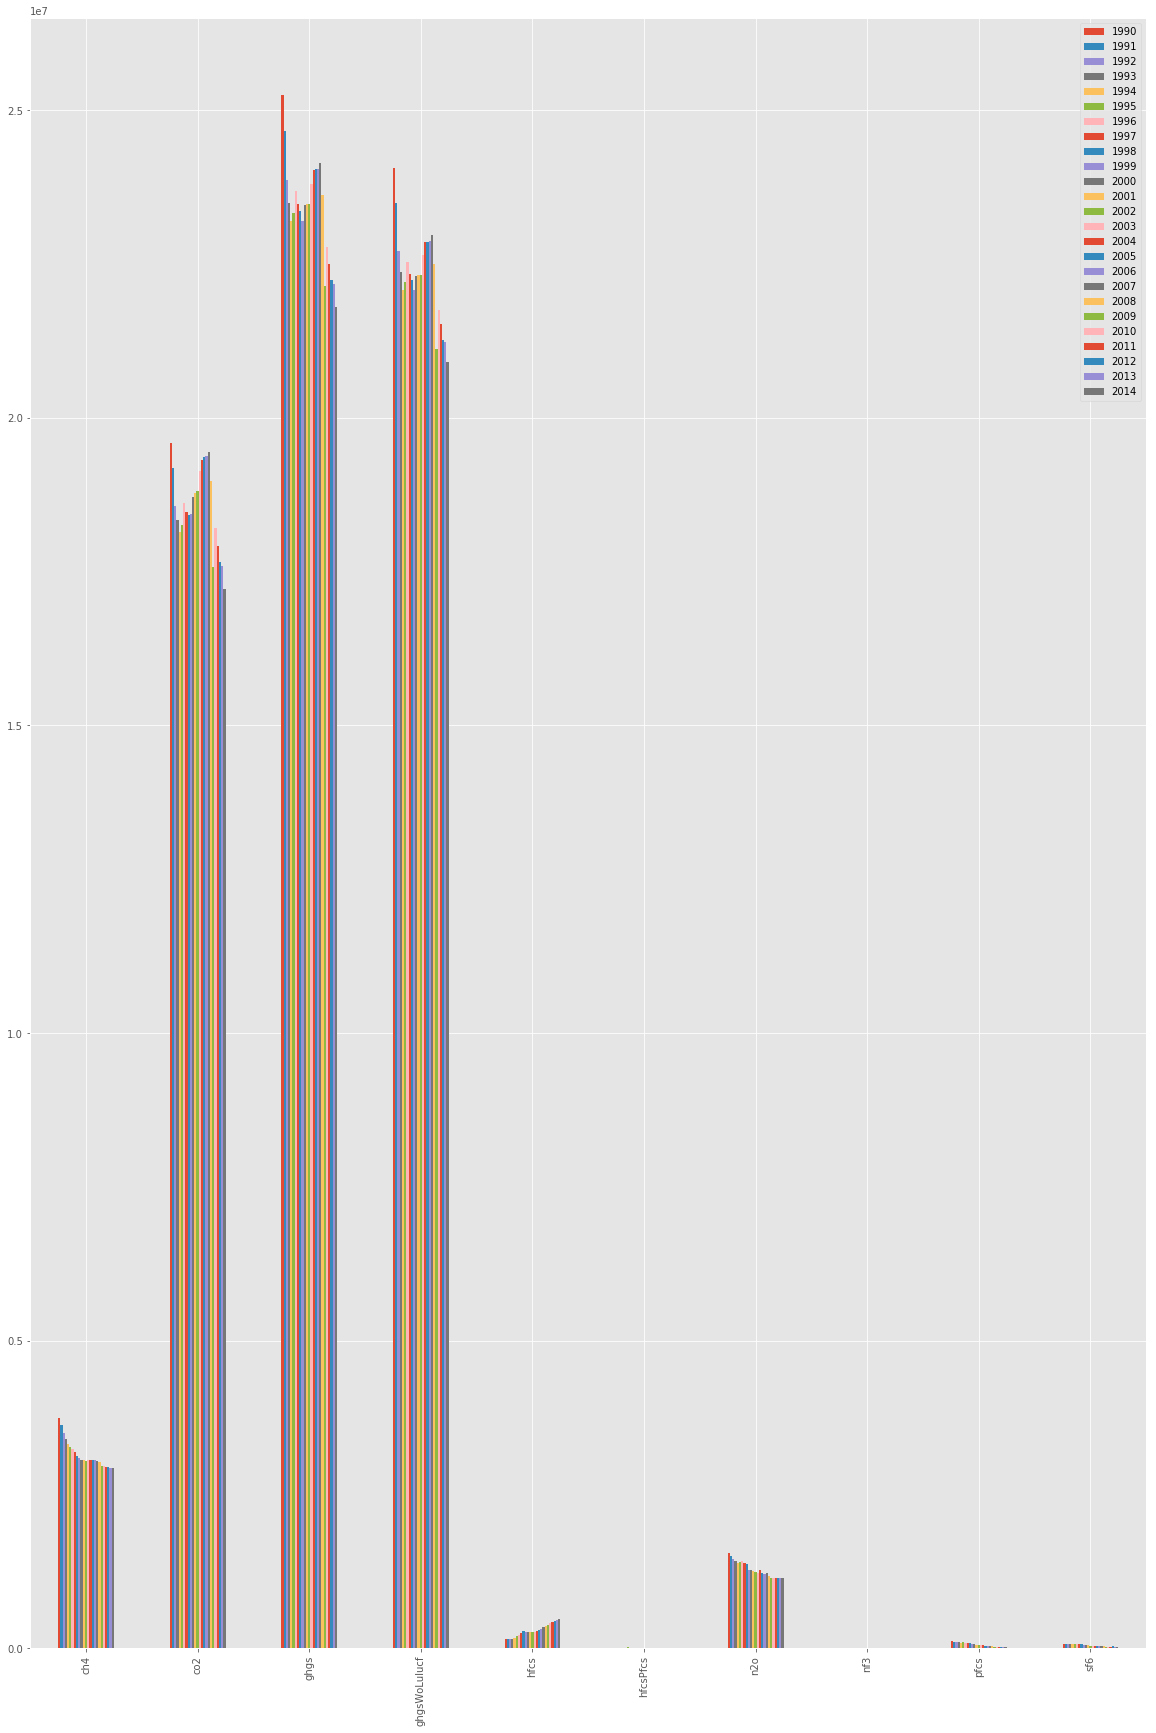

In [20]:
yearvsemission_Gas.plot(kind='bar', figsize=(20, 30))

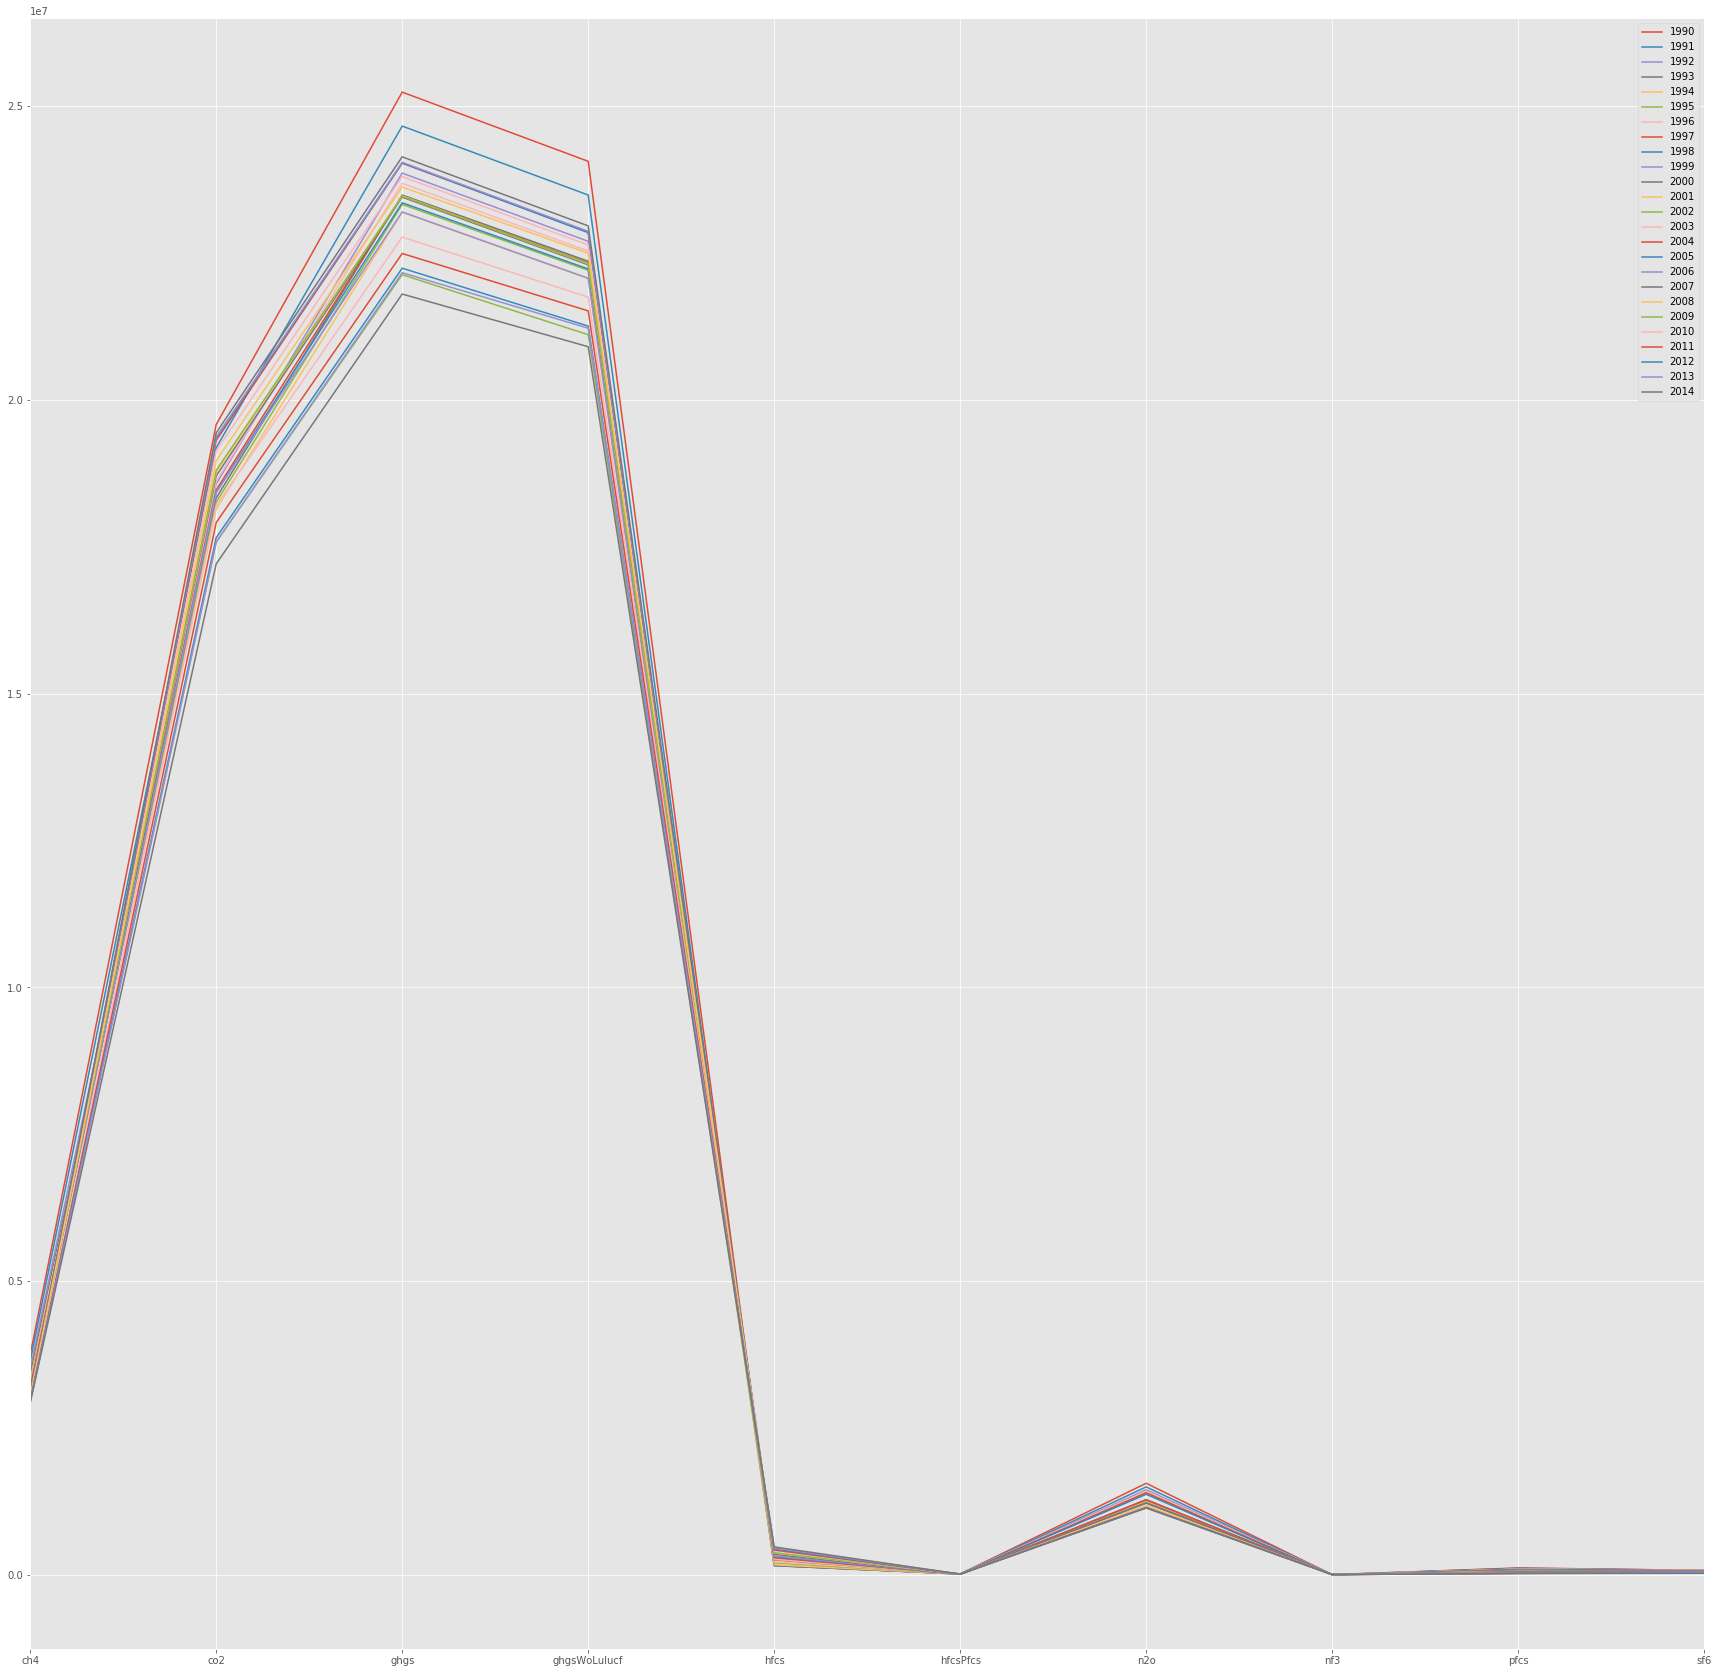

In [21]:
yearvsemission_Gas.plot(kind='line', figsize=(30, 30))

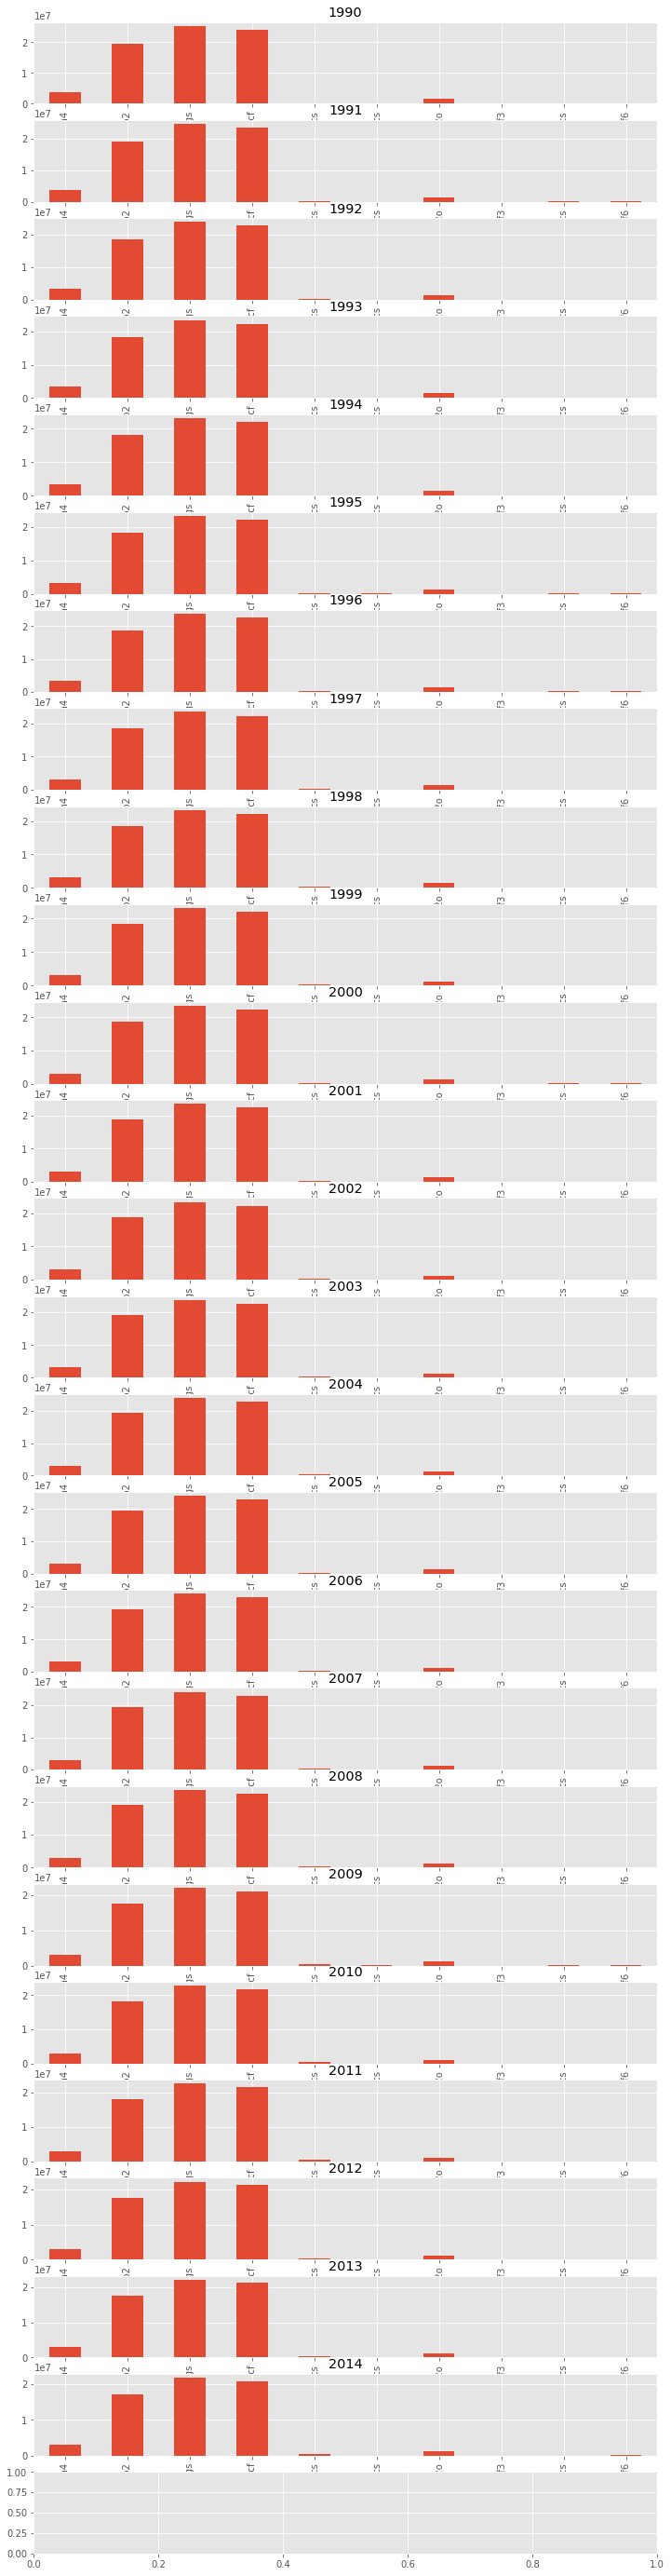

In [22]:
fig, axes = plt.subplots(nrows=26, ncols=1)
for i, c in enumerate(yearvsemission_Gas.columns):
    yearvsemission_Gas[c].plot(kind='bar', ax=axes[i], figsize=(12, 50), title=c)

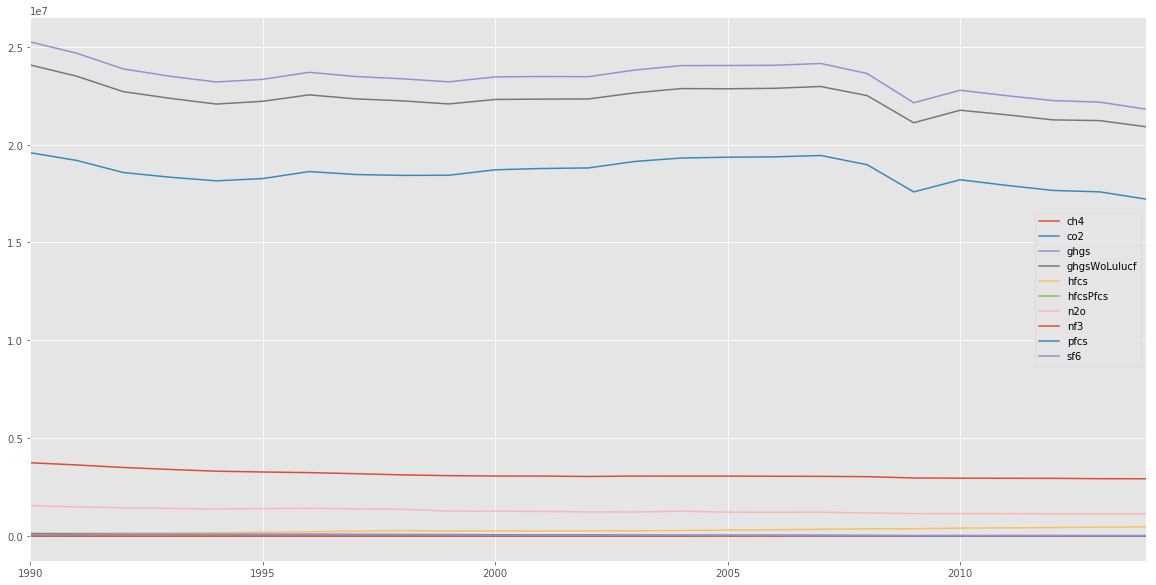

In [23]:
yearvsemission_year.plot(kind='line', figsize=(20, 10))

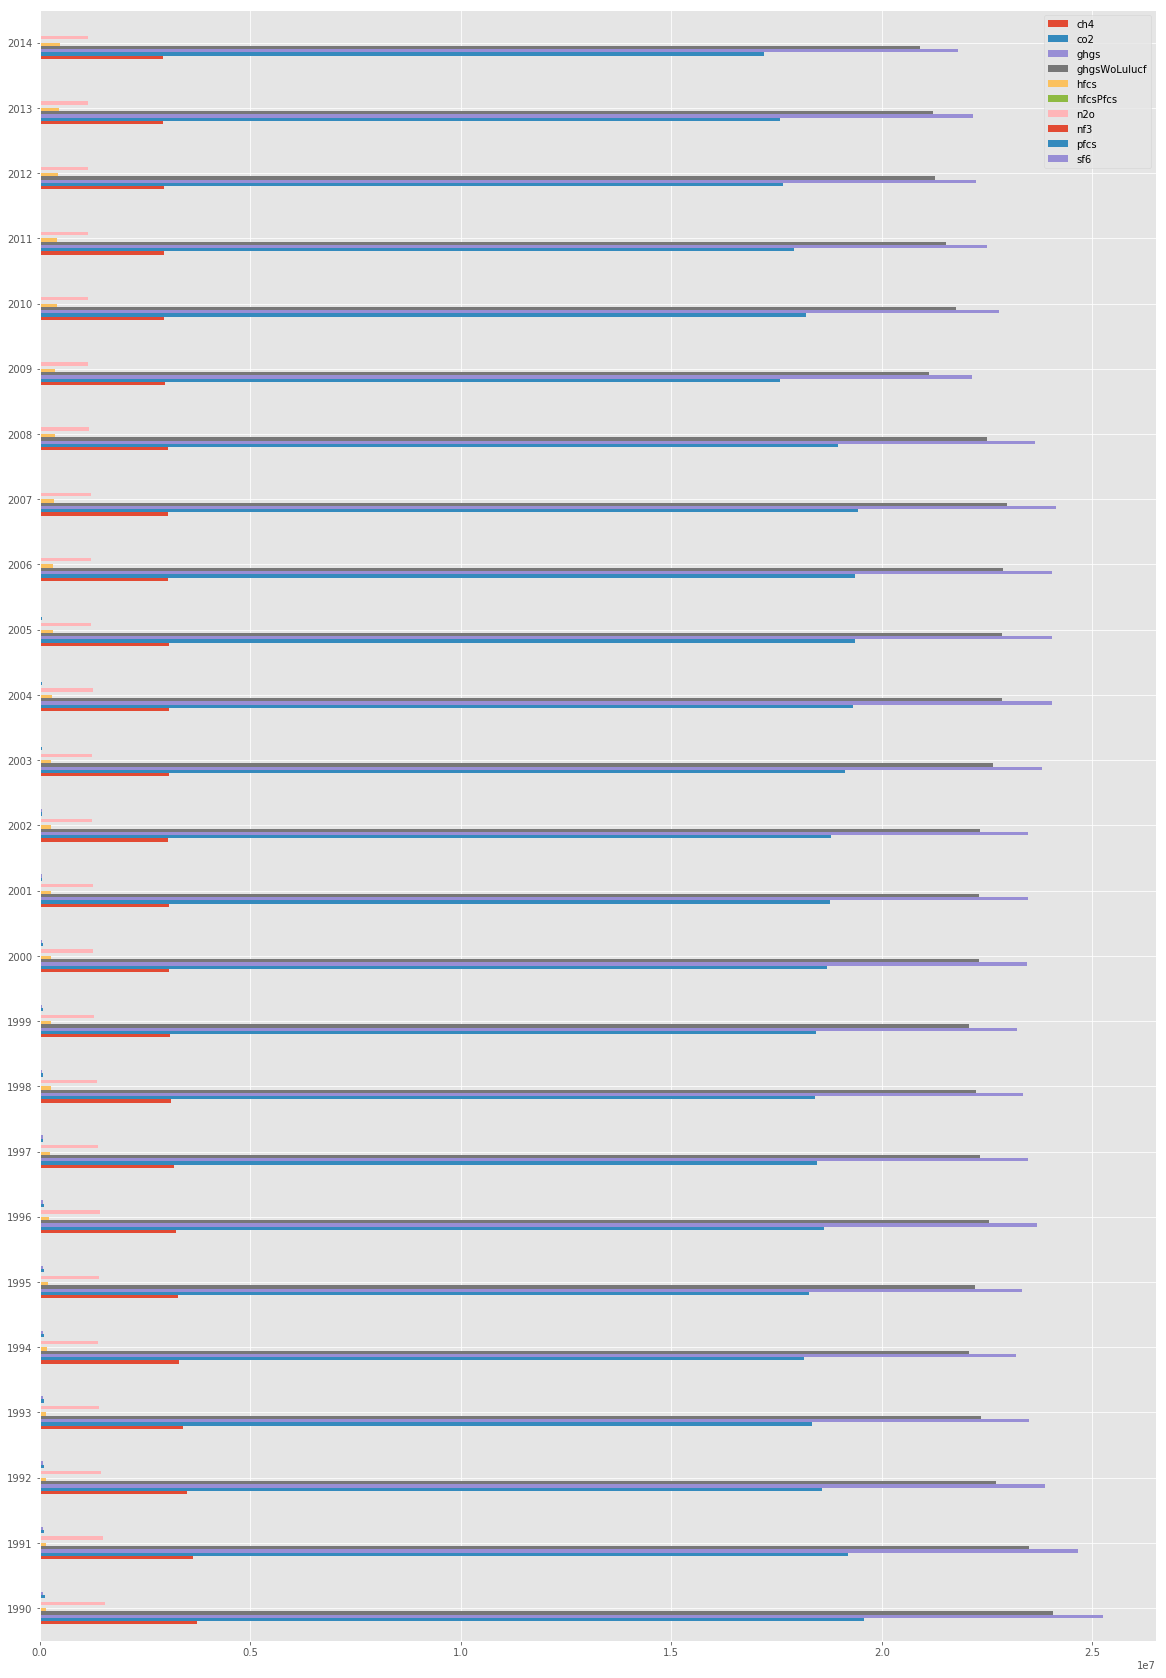

In [24]:
yearvsemission_year.plot(kind='barh', figsize=(20, 30))

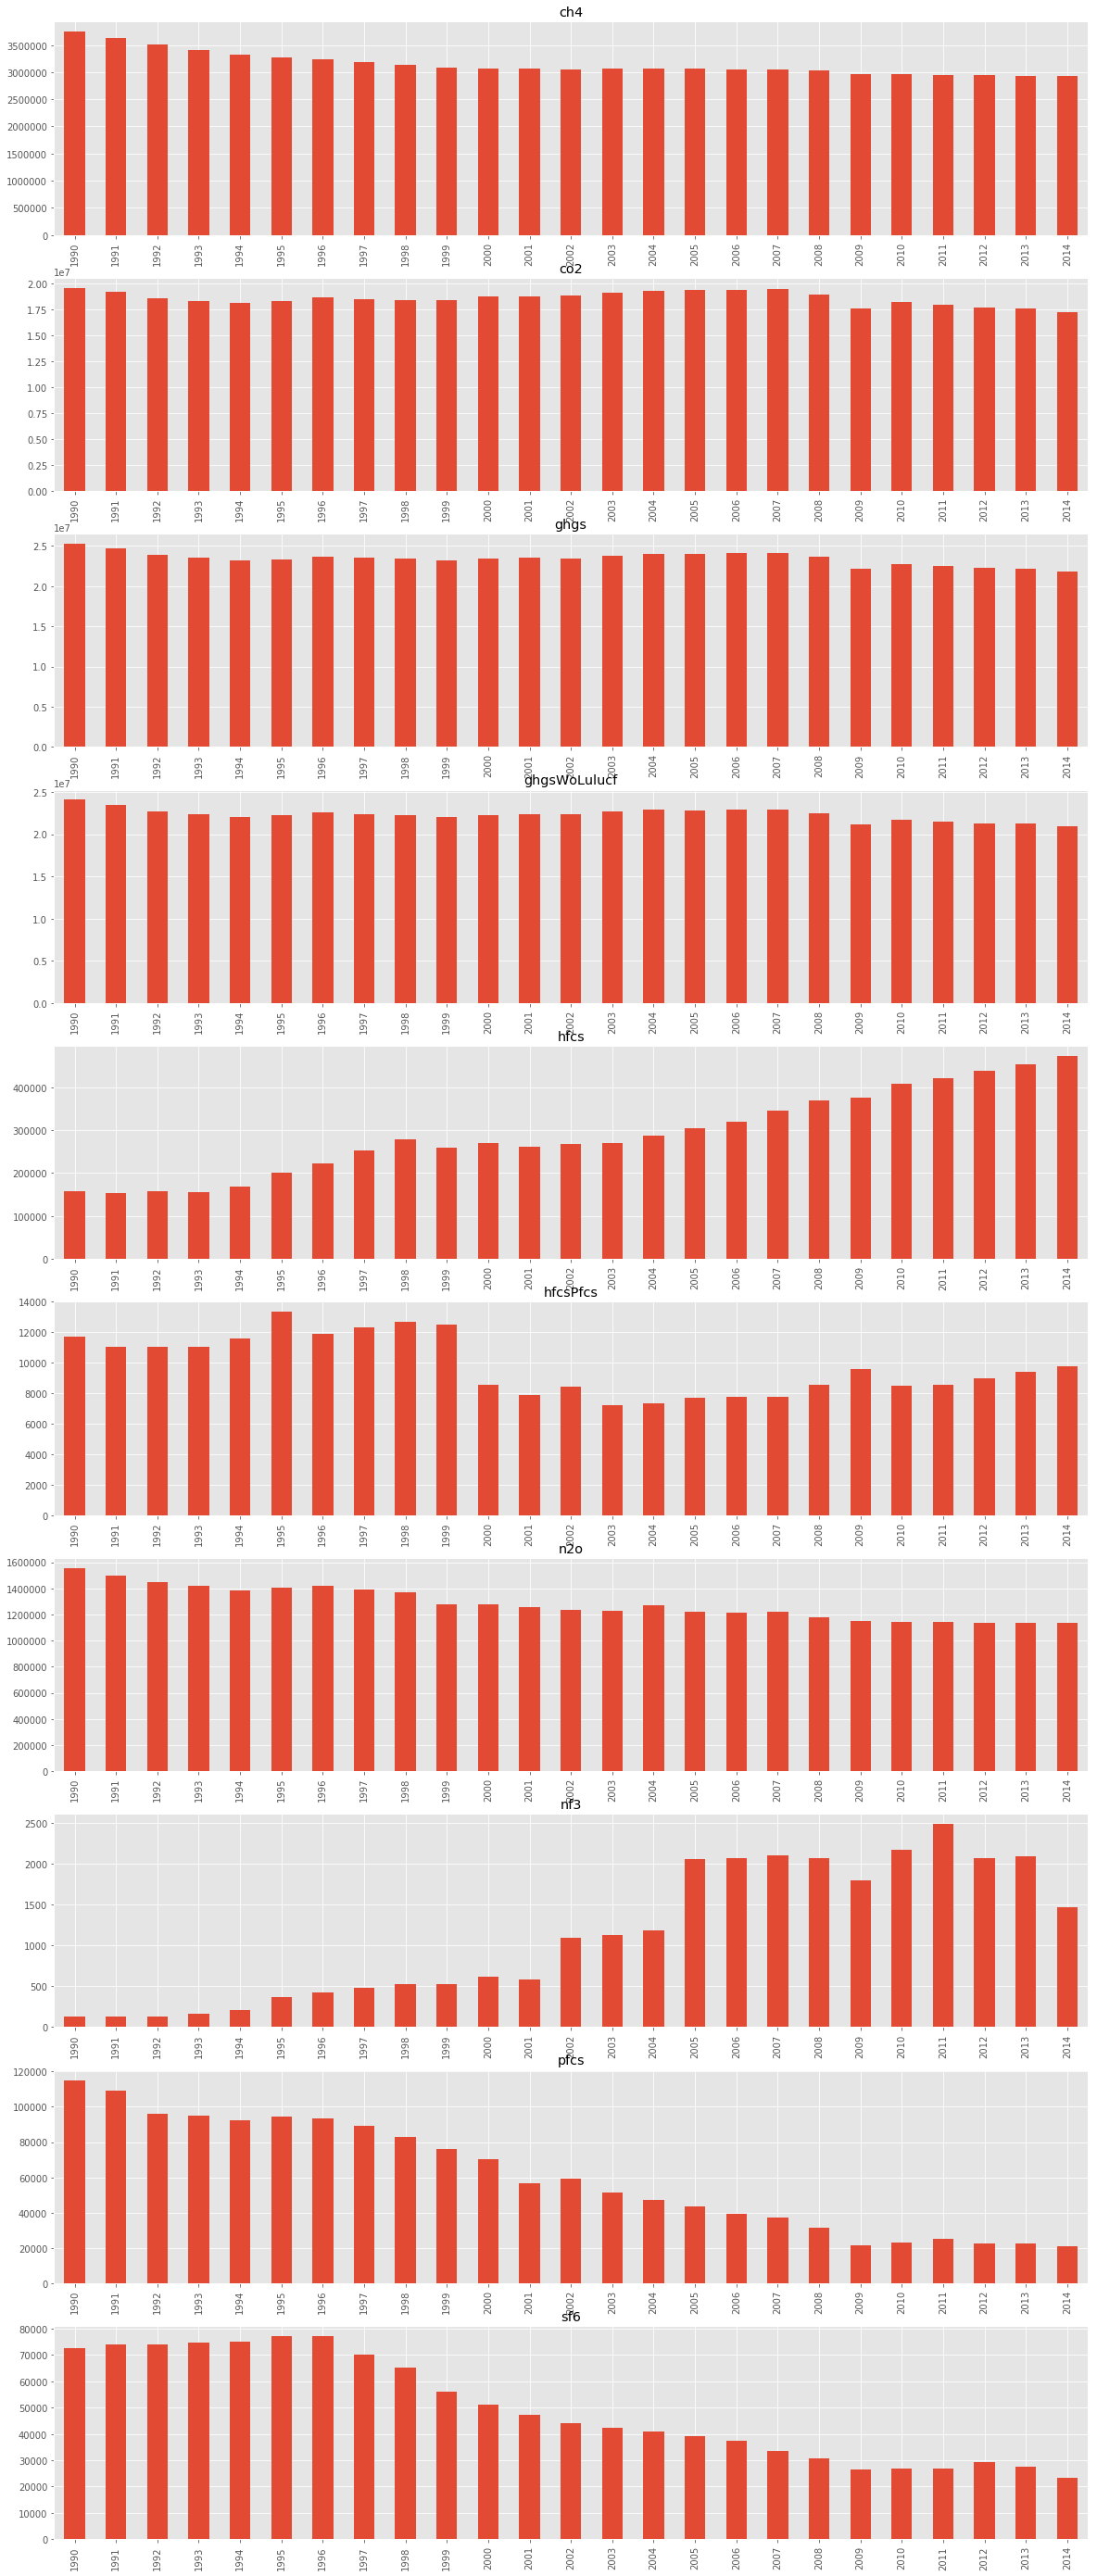

In [25]:
fig, axes = plt.subplots(nrows=10, ncols=1)
#axes.ticklabel_format(useOffset=False)
for i, c in enumerate(yearvsemission_year.columns):
    yearvsemission_year[c].plot(kind='bar', ax=axes[i],figsize=(20, 50),title=c)
    

In [26]:
##  Total Emission By Country over time period  1990-2014
countryvsemission= {}
'''{
       "Country" : {
               "emission1" : sum(emission from 1990-2014),
               "emission2" : sum(emissionrom 1990-2014),
               .................
       
       }
       
   }
''' 


for item in GGE_data:
    if(item[0]!='country_or_area'):
        countryvsemission[item[0]]= {}
        
    
#print(yearvsemission)
for item in GGE_data:
    if(item[0]!='country_or_area'):
        temp = countryvsemission[item[0]]
        #print(temp)
        emission = item[3]
        
                   
        if(emission == 'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'):
            emission='co2'
        elif(emission =='greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent'):
            emission='ghgsWoLulucf'
        elif(emission =='greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'):
            emission='ghgs'
        elif(emission =='hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent'):
            emission='hfcs'
        elif(emission =='methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'):
            emission='ch4'
        elif(emission =='nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent'):
            emission='nf3'
        elif(emission =='nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'):
            emission='n2o'
        elif(emission =='perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent'):
            emission='pfcs'
        elif(emission =='sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent'):
            emission='sf6'
        else:
            emission='hfcsPfcs'
        
        if emission in temp:
            temp[emission] += float(item[2])
        else:
            temp[emission] = float(item[2])
        countryvsemission[item[0]] = temp

print(countryvsemission)


{'Australia': {'co2': 8855198.774401547, 'ghgsWoLulucf': 12145818.279379068, 'ghgs': 12145818.279379068, 'hfcs': 104309.28426076921, 'ch4': 2685207.0173146967, 'n2o': 456593.0470539716, 'pfcs': 39612.90218007134, 'sf6': 4897.254168014268}, 'Austria': {'co2': 1723077.1265641411, 'ghgsWoLulucf': 2073041.4829034759, 'ghgs': 2073041.4829034759, 'hfcs': 21803.835883639575, 'ch4': 209723.82273037866, 'nf3': 343.329001513892, 'n2o': 98178.75251848715, 'pfcs': 5141.025269554239, 'sf6': 14773.59093576169}, 'Belarus': {'co2': 1592833.4084299612, 'ghgsWoLulucf': 2278679.062625429, 'ghgs': 2278679.062625429, 'ch4': 384096.98366769997, 'n2o': 301731.864613568, 'sf6': 16.805914199999997}, 'Belgium': {'co2': 2988243.0113799684, 'ghgsWoLulucf': 3541338.3106097146, 'ghgs': 3541338.3106097146, 'hfcs': 35862.643553416456, 'ch4': 253507.91939679682, 'nf3': 8.08744, 'n2o': 225022.2128367038, 'pfcs': 23713.25118324104, 'sf6': 14981.184819589542}, 'Bulgaria': {'co2': 1305710.1920746767, 'ghgs': 1686519.82874

In [27]:
# Data Arranged as Category Vs Year 
countryvsemission_df_Gas = pd.DataFrame(countryvsemission)
countryvsemission_df_Gas

,Australia,Austria,Belarus,Belgium,Bulgaria,Canada,Croatia,Cyprus,Czech Republic,Denmark,...,Russian Federation,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom,United States of America
ch4,2685207.02,209723.82,384096.98,253507.92,257602.08,2782150.10,77426.83,21488.71,397477.56,204331.04,...,18952692.61,136065.55,58333.13,851882.36,171303.63,136959.43,1174153.62,2960562.40,2562049.31,18394520.81
co2,8855198.77,1723077.13,1592833.41,2988243.01,1305710.19,13525812.20,506963.08,172950.62,3131509.01,1382883.21,...,42662426.84,1072335.19,395228.52,7297994.70,1361697.90,1096733.99,6264342.81,8847751.65,13645516.91,141609119.33
ghgs,12145818.28,2073041.48,2278679.06,3541338.31,1686519.83,17594747.47,651460.07,206042.33,3741821.66,1761383.97,...,65027126.53,1295210.69,481075.69,8840948.60,1692896.16,1322766.73,7950611.54,12627797.78,17400143.23,173703276.94
ghgsWoLulucf,12145818.28,2073041.48,2278679.06,3541338.31,nan,17815654.67,651460.07,206042.33,3774080.48,1782569.86,...,65027126.53,1295210.69,481075.69,nan,1692896.16,1327777.26,7950611.54,12627797.78,nan,173703276.94
hfcs,104309.28,21803.84,nan,35862.64,9451.67,104438.82,6984.84,2555.76,20525.03,15464.35,...,500970.58,5236.75,3105.63,250591.73,14632.43,19218.28,30725.40,7057.10,383068.07,2596454.60
hfcsPfcs,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,120661.62
n2o,456593.05,98178.75,301731.86,225022.21,113545.47,1026557.82,57723.62,9044.87,189556.68,156834.21,...,2671264.29,79383.63,21526.36,423086.69,135949.93,64539.30,459541.80,809606.02,769408.83,10224049.20
nf3,nan,343.33,nan,8.09,nan,5.60,nan,nan,7.97,nan,...,nan,nan,nan,nan,nan,20.71,nan,nan,16.77,8652.53
pfcs,39612.90,5141.03,nan,23713.25,0.31,110628.75,2091.45,nan,281.51,324.60,...,210980.68,1855.01,2510.68,13152.16,6812.19,1262.36,10763.53,2721.93,12967.32,302067.44
sf6,4897.25,14773.59,16.81,14981.18,210.11,45154.19,270.25,2.38,2463.90,1546.55,...,28791.52,334.57,371.37,4240.96,2500.09,4032.66,11084.38,98.68,27116.01,447751.41


In [28]:
# Data Arranged as Year Vs Category 
countryvsemission_df_Country = countryvsemission_df_Gas.T
countryvsemission_df_Country

,ch4,co2,ghgs,ghgsWoLulucf,hfcs,hfcsPfcs,n2o,nf3,pfcs,sf6
Australia,2685207.02,8855198.77,12145818.28,12145818.28,104309.28,nan,456593.05,nan,39612.90,4897.25
Austria,209723.82,1723077.13,2073041.48,2073041.48,21803.84,nan,98178.75,343.33,5141.03,14773.59
Belarus,384096.98,1592833.41,2278679.06,2278679.06,nan,nan,301731.86,nan,nan,16.81
Belgium,253507.92,2988243.01,3541338.31,3541338.31,35862.64,nan,225022.21,8.09,23713.25,14981.18
Bulgaria,257602.08,1305710.19,1686519.83,nan,9451.67,nan,113545.47,nan,0.31,210.11
Canada,2782150.10,13525812.20,17594747.47,17815654.67,104438.82,nan,1026557.82,5.60,110628.75,45154.19
Croatia,77426.83,506963.08,651460.07,651460.07,6984.84,nan,57723.62,nan,2091.45,270.25
Cyprus,21488.71,172950.62,206042.33,206042.33,2555.76,nan,9044.87,nan,nan,2.38
Czech Republic,397477.56,3131509.01,3741821.66,3774080.48,20525.03,nan,189556.68,7.97,281.51,2463.90
Denmark,204331.04,1382883.21,1761383.97,1782569.86,15464.35,nan,156834.21,nan,324.60,1546.55


In [29]:

# Data Source 2 : International Energy Statistics 
i=1
EnergyStatistics = []
with open('data/international-energy-statistics/all_energy_statistics.csv', encoding="utf8") as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        EnergyStatistics.append(row)
        #print(EnergyStatistics)
        i=i+1
print("Number of Data Point:"+ str(i))    
print("Sample Data")
#print(EnergyStatistics[:10])

for i in range(1,10):
    print(EnergyStatistics[i])


Number of Data Point:1189484
Sample Data
['Austria', 'Additives and Oxygenates - Exports', '1996', 'Metric tons,  thousand', '5', '', 'additives_and_oxygenates']
['Austria', 'Additives and Oxygenates - Exports', '1995', 'Metric tons,  thousand', '17', '', 'additives_and_oxygenates']
['Belgium', 'Additives and Oxygenates - Exports', '2014', 'Metric tons,  thousand', '0', '', 'additives_and_oxygenates']
['Belgium', 'Additives and Oxygenates - Exports', '2013', 'Metric tons,  thousand', '0', '', 'additives_and_oxygenates']
['Belgium', 'Additives and Oxygenates - Exports', '2012', 'Metric tons,  thousand', '35', '', 'additives_and_oxygenates']
['Belgium', 'Additives and Oxygenates - Exports', '2011', 'Metric tons,  thousand', '25', '', 'additives_and_oxygenates']
['Belgium', 'Additives and Oxygenates - Exports', '2010', 'Metric tons,  thousand', '22', '', 'additives_and_oxygenates']
['Belgium', 'Additives and Oxygenates - Exports', '2009', 'Metric tons,  thousand', '45', '', 'additives_and

In [30]:
'''
['country_or_area', 'commodity_transaction', 'year', 'unit, million', 'quantity', 'quantity_footnotes', 'category']
['Viet Nam', 'Electricity - total wind production', '2008', 'Kilowatt-hours, million', '1', '', 'wind_electricity']
'''

"\n['country_or_area', 'commodity_transaction', 'year', 'unit, million', 'quantity', 'quantity_footnotes', 'category']\n['Viet Nam', 'Electricity - total wind production', '2008', 'Kilowatt-hours, million', '1', '', 'wind_electricity']\n"

In [32]:
# undertsanding the data and how many different categories exist
country_list_ES = set()
commodity_transaction_list_ES =set()
year_list_ES = set()
unit_list_ES = set()
quantity_footnotes_list_ES = set()


category_list_ES = set()

with open('data/international-energy-statistics/all_energy_statistics.csv', encoding="utf8") as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        country_list_ES.add(row[0])
        commodity_transaction_list_ES.add(row[1])
        year_list_ES.add(row[2])
        unit_list_ES.add(row[3])
        quantity_footnotes_list_ES.add(row[5])
        category_list_ES.add(row[6])
    






In [33]:
print(len(country_list_ES))
print(country_list_ES)

244
{'T.F.Yug.Rep. Macedonia', 'El Salvador', 'Poland', 'Equatorial Guinea', 'country_or_area', 'Fiji', 'Tonga', 'Tajikistan', 'Vanuatu', 'Canada', 'China, Macao SAR', 'Puerto Rico', 'Afghanistan', 'Guadeloupe', 'Japan', 'Mayotte', 'Guam', 'Iceland', 'Cameroon', 'New Zealand', 'Ghana', 'St. Pierre-Miquelon', 'Pakistan', 'Benin', 'Bonaire, St Eustatius, Saba', 'Nauru', 'St. Vincent-Grenadines', 'Bangladesh', 'India', 'China, Hong Kong SAR', 'Slovenia', 'Greece', 'Czechia', 'Kyrgyzstan', 'Chile', 'Georgia', 'Rwanda', 'Romania', 'Syrian Arab Republic', 'Burkina Faso', 'Aruba', 'South Africa', 'Iran (Islamic Rep. of)', 'British Virgin Islands', 'Slovakia', 'Papua New Guinea', 'Malta', 'Falkland Is. (Malvinas)', 'France', 'Russian Federation', 'Greenland', 'Denmark', 'Palau', 'Gibraltar', 'Haiti', 'Barbados', 'China', 'Sweden', 'Luxembourg', 'Israel', 'Sudan', 'Kenya', 'Mali', 'Cayman Islands', 'Bolivia (Plur. State of)', 'Comoros', 'Neth. Antilles (former)', 'Central African Rep.', 'Togo',

In [34]:
print(len(commodity_transaction_list_ES))
print(commodity_transaction_list_ES)



2453
{'Motor Gasoline - Non-energy uses', 'Lubricants - production from refineries', 'Kerosene-type Jet Fuel - Consumption by other manuf., const. and non-fuel min. ind.', 'Refinery Gas - Transformation in heat plants - autoproducers', 'Other oil products n.e.c. - Transformation in coke ovens', 'Municipal Wastes - Consumption by paper, pulp and print', 'Natural Gas (including LNG) - receipts from other sources', 'Anthracite - transformation in electricity plants - autoproducers', 'Feedstocks - exports', 'Kerosene-type Jet Fuel - Consumption by manufacturing, construction and non-fuel mining industry', 'Municipal wastes - consumption not elsewhere specified (other)', 'Naphtha - Consumption by iron and steel industry', 'Gasworks Gas - Consumption by food and tobacco ', 'Blast Furnace Gas - Consumption by paper, pulp and print', 'Natural gas (including LNG) - consumption not elsewhere specified (transport)', 'Brown coal briquettes - transformation in briquetting plants', 'Fuel oil - Own u

In [35]:
print(len(year_list_ES))
print(year_list_ES)



26
{'1996', '2013', '2003', '1990', '2010', '1997', '1991', '2000', '2012', '2001', '2011', '2007', '1992', '2002', '2008', '1993', '1994', '2006', '2009', '2005', '2004', '1999', '1995', '2014', 'year', '1998'}


In [36]:
print(len(unit_list_ES))
print(unit_list_ES)



7
{'Kilowatts,  thousand', 'Metric Tons', 'unit', 'Kilowatt-hours, million', 'Cubic metres, thousand', 'Metric tons,  thousand', 'Terajoules'}


In [37]:
print(len(quantity_footnotes_list_ES))
print(quantity_footnotes_list_ES)



3
{'', '1', 'quantity_footnotes'}


In [38]:

print(len(category_list_ES))
print(category_list_ES)

72
{'sub_bituminous_coal', 'biogases', 'refinery_feedstocks', 'brown_coal_briquettes', 'thermal_electricity', 'hydro', 'lubricants', 'coke_oven_coke', 'other_kerosene', 'other_recovered_gases', 'peat', 'bagasse', 'municipal_wastes', 'gasworks_gas', 'anthracite', 'paraffin_waxes', 'aviation_gasoline', 'uranium', 'gas_oil_diesel_oil', 'naphtha', 'bitumen', 'total_refinery_output', 'total_electricity', 'wind_electricity', 'other_bituminous_coal', 'solar_electricity', 'biodiesel', 'falling_water', 'coal_tar', 'geothermal', 'direct_use_of_geothermal_heat', 'fuel_oil', 'brown_coal', 'tide_wave_and_ocean_electricity', 'refinery_gas', 'of_which_biodiesel', 'electricity_net_installed_capacity_of_electric_power_plants', 'direct_use_of_solar_thermal_heat', 'motor_gasoline', 'patent_fuel', 'additives_and_oxygenates', 'charcoal', 'white_spirit_and_special_boiling_point_industrial_spirits', 'oil_shale_oil_sands', 'peat_products', 'black_liquor', 'liquified_petroleum_gas', 'other_vegetal_material_and

In [40]:
##  Energy Stat By Year over time period  1990-2014

'''
['country_or_area', 'commodity_transaction', 'year', 'unit, million', 'quantity', 'quantity_footnotes', 'category']
['Viet Nam', 'Electricity - total wind production', '2008', 'Kilowatt-hours, million', '1', '', 'wind_electricity']
'''

yearwiseEnergyStat= {}
'''{
       "1990" : {
               "commodity_transaction" : sum(commodity_transaction by all countries in 1990),
               "emission2" : sum(emission by all countries in 1991),
               .................
       
       }
       
   }
''' 


for item in EnergyStatistics:
    if(item[2]!='year'):
        yearwiseEnergyStat[item[2]]= {}
        
    
print(yearwiseEnergyStat)


{'1996': {}, '1995': {}, '2014': {}, '2013': {}, '2012': {}, '2011': {}, '2010': {}, '2009': {}, '1998': {}, '2008': {}, '2007': {}, '2006': {}, '2005': {}, '2004': {}, '2003': {}, '2002': {}, '2001': {}, '2000': {}, '1999': {}, '1997': {}, '1994': {}, '1993': {}, '1992': {}, '1991': {}, '1990': {}}


In [42]:
for item in EnergyStatistics:
    if(item[2]!='year'):
        temp = yearwiseEnergyStat[item[2]]
        #print(temp)
        commodity_transaction = item[1]
        if commodity_transaction in temp:
            temp[commodity_transaction] += float(item[4])
        else:
            temp[commodity_transaction] = float(item[4])
        yearwiseEnergyStat[item[2]] = temp

print(yearwiseEnergyStat["1996"])


{'Additives and Oxygenates - Exports': 750.0, 'Additives and Oxygenates - Imports': 3186.0, 'Additives and Oxygenates - Production': 9882.0, 'Additives and Oxygenates - Receipts from other sources': 231.0, 'Additives and Oxygenates - Stock changes': 163.0, 'Additives and Oxygenates - Total energy supply': 12386.0, 'Additives and Oxygenates - transfers and recycled products': 2025.0, 'Additives and Oxygenates - Transformation': 10888.0, 'Additives and Oxygenates - Transformation in oil refineries': 10888.0, 'Animal waste - Consumption by commerce and public services': 45106.0, 'Animal waste - Consumption by households': 450250.0, 'Animal waste - Consumption by manufacturing, construction and non-fuel industry': 56659.168, 'Animal waste - Consumption by other': 522265.0, 'Animal waste - Consumption by other manuf., const. and non-fuel min. ind.': 56659.168, 'Animal waste - Consumption in agriculture, forestry and fishing': 26885.0, 'Animal waste - Consumption not elsewhere specified (oth

In [23]:
print(yearwiseEnergyStat["1997"])

{'Additives and Oxygenates - Exports': 705.0, 'Additives and Oxygenates - Imports': 3714.0, 'Additives and Oxygenates - Production': 11051.0, 'Additives and Oxygenates - Receipts from other sources': 185.0, 'Additives and Oxygenates - Stock changes': -19.0, 'Additives and Oxygenates - Total energy supply': 14264.0, 'Additives and Oxygenates - transfers and recycled products': 3271.0, 'Additives and Oxygenates - Transformation': 11310.0, 'Additives and Oxygenates - Transformation in oil refineries': 11310.0, 'Animal waste - Consumption by commerce and public services': 42099.0, 'Animal waste - Consumption by households': 325279.0, 'Animal waste - Consumption by manufacturing, construction and non-fuel industry': 67570.184, 'Animal waste - Consumption by other': 398689.0, 'Animal waste - Consumption by other manuf., const. and non-fuel min. ind.': 67570.184, 'Animal waste - Consumption in agriculture, forestry and fishing': 31286.0, 'Animal waste - Consumption not elsewhere specified (ot

In [24]:
# Data Arranged as Category Vs Year 
yearwiseEnergyStat_df = pd.DataFrame(yearwiseEnergyStat)
yearwiseEnergyStat_df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Additives and Oxygenates - Exports,nan,nan,nan,nan,467.00,657.00,750.00,705.00,1802.00,1589.00,...,2110.00,3505.00,3781.00,2625.00,2981.00,3431.00,3156.00,3099.00,3044.00,3057.00
Additives and Oxygenates - Imports,436.00,570.00,743.00,2149.00,3023.00,3168.00,3186.00,3714.00,4104.00,4527.00,...,3766.00,5127.00,4984.56,5781.42,4658.33,5414.43,6644.82,7507.88,7650.51,10405.15
Additives and Oxygenates - Production,73.00,1691.00,1677.00,8223.00,8343.00,8840.00,9882.00,11051.00,11435.00,12300.00,...,8065.00,5607.00,5667.00,5642.65,6279.02,4328.21,4022.39,3884.22,3688.53,3777.53
Additives and Oxygenates - Receipts from other sources,128.00,130.00,177.00,172.00,184.00,182.00,231.00,185.00,138.00,135.00,...,288.00,210.00,226.00,304.00,339.00,2974.00,3122.00,2983.00,2959.00,2888.00
Additives and Oxygenates - Stock changes,11.00,3.00,25.00,1408.00,648.00,-784.00,163.00,-19.00,88.00,-3.00,...,-201.00,270.00,217.00,504.00,333.00,-23.00,216.00,230.00,-62.00,182.00
Additives and Oxygenates - Total energy supply,626.00,2388.00,2572.00,9136.00,10435.00,12317.00,12386.00,14264.00,13787.00,15376.00,...,10210.00,7169.00,6879.56,8599.07,7962.35,9308.64,10417.21,11046.10,11316.04,13831.68
Additives and Oxygenates - Transformation,627.00,1892.00,2206.00,5591.00,5645.00,9559.00,10888.00,11310.00,11588.00,12494.00,...,7761.00,7100.00,6896.56,7152.40,6589.30,7255.40,6738.80,6278.85,6559.51,7673.15
Additives and Oxygenates - Transformation in oil refineries,627.00,1892.00,2206.00,5591.00,5645.00,9559.00,10888.00,11310.00,11588.00,12494.00,...,7761.00,7100.00,6896.56,7152.40,6589.30,7255.40,6738.80,6278.85,6559.51,7673.15
Additives and Oxygenates - transfers and recycled products,nan,507.00,366.00,3517.00,3716.00,3422.00,2025.00,3271.00,3474.00,3524.00,...,2726.00,1214.00,1225.00,1881.65,1640.02,2185.21,3463.39,4959.22,5415.53,6885.53
Animal waste - Consumption by commerce and public services,nan,nan,nan,nan,44103.00,45106.00,45106.00,42099.00,47216.00,51423.00,...,70253.00,62860.00,57380.00,57019.00,52031.00,14394.00,16574.00,21879.00,35001.00,42805.00


In [43]:
##  Energy StatBy Country over time period  1990-2014

'''
['country_or_area', 'commodity_transaction', 'year', 'unit, million', 'quantity', 'quantity_footnotes', 'category']
['Viet Nam', 'Electricity - total wind production', '2008', 'Kilowatt-hours, million', '1', '', 'wind_electricity']
'''

CountrywiseEnergyStat= {}
'''{
       "Country" : {
               "commodity_transaction" : sum(commodity_transaction by all countries in 1990-2017),
                : sum(emission by all countries in 1991),
               .................
       
       }
       
   }
''' 


for item in EnergyStatistics:
    if(item[0]!='country_or_area'):
        CountrywiseEnergyStat[item[0]]= {}
        
print(CountrywiseEnergyStat)

{'Austria': {}, 'Belgium': {}, 'Czechia': {}, 'Finland': {}, 'France': {}, 'Greece': {}, 'Hungary': {}, 'Italy': {}, 'Korea, Republic of': {}, 'Netherlands': {}, 'Romania': {}, 'Serbia': {}, 'Slovakia': {}, 'Ukraine': {}, 'United Kingdom': {}, 'United States': {}, 'Brunei Darussalam': {}, 'Bulgaria': {}, 'Canada': {}, 'Chile': {}, 'Croatia': {}, 'Iran (Islamic Rep. of)': {}, 'Jordan': {}, 'Lithuania': {}, 'Mexico': {}, 'Oman': {}, 'Other Asia': {}, 'Poland': {}, 'Portugal': {}, 'Spain': {}, 'Sweden': {}, 'Switzerland': {}, 'T.F.Yug.Rep. Macedonia': {}, 'Turkey': {}, 'Uzbekistan': {}, 'Argentina': {}, 'Colombia': {}, 'Germany': {}, 'Norway': {}, 'Australia': {}, 'China, Macao SAR': {}, 'Japan': {}, 'Denmark': {}, 'Ireland': {}, 'Philippines': {}, 'Bangladesh': {}, 'Eritrea': {}, 'Ethiopia': {}, 'Lesotho': {}, 'Nepal': {}, 'Niger': {}, 'Pakistan': {}, 'Serbia and Montenegro': {}, 'Tunisia': {}, 'Botswana': {}, 'Georgia': {}, 'Republic of Moldova': {}, 'Peru': {}, 'South Africa': {}, 'Ice

In [44]:
for item in EnergyStatistics:
    if(item[0]!='country_or_area'):
        temp = CountrywiseEnergyStat[item[0]]
        #print(temp)
        commodity_transaction = item[1]
        if commodity_transaction in temp:
            temp[commodity_transaction] += float(item[4])
        else:
            temp[commodity_transaction] = float(item[4])
        CountrywiseEnergyStat[item[0]] = temp

print(CountrywiseEnergyStat["Afghanistan"])

{'Aviation gasoline - Consumption by transport': 6.0, 'Aviation gasoline - Consumption in domestic aviation': 6.0, 'Aviation gasoline - Final consumption': 6.0, 'Aviation gasoline - Final energy consumption': 6.0, 'Aviation gasoline - International aviation bunkers': 0.0, 'Aviation gasoline - Stock changes': -2.0, 'Aviation gasoline - Total energy supply': 2.0, 'Charcoal - Consumption by households': 2098.96, 'Charcoal - Consumption by other': 2098.96, 'Charcoal - Exports': 0.076, 'Charcoal - Final consumption': 2098.96, 'Charcoal - Final energy consumption': 2098.96, 'Charcoal - Imports': 0.20400000000000001, 'Charcoal - Production': 2098.8320000000003, 'Charcoal - Total energy supply': 2098.96, 'Electricity - net installed capacity of electric power plants, public combustible fuels': 2305.0, 'Electricity - net installed capacity of electric power plants, public hydro': 6812.0, 'Electricity - net installed capacity of electric power plants, self-producer combustible fuels': 1445.0, 'E

In [45]:
# Data Arranged as Category Vs Country 
CountrywiseEnergyStat_df = pd.DataFrame(CountrywiseEnergyStat)
CountrywiseEnergyStat_df

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctic Fisheries,Antigua and Barbuda,Argentina,...,Vanuatu,Venezuela (Bolivar. Rep.),Viet Nam,Wallis and Futuna Is.,Yemen,Yemen Arab Rep. (former),"Yemen, Dem. (former)","Yugoslavia, SFR (former)",Zambia,Zimbabwe
Additives and Oxygenates - Exports,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Additives and Oxygenates - Imports,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Additives and Oxygenates - Production,nan,nan,nan,nan,nan,nan,nan,nan,nan,1914.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Additives and Oxygenates - Receipts from other sources,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Additives and Oxygenates - Stock changes,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Additives and Oxygenates - Total energy supply,nan,nan,nan,nan,nan,nan,nan,nan,nan,1914.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Additives and Oxygenates - Transformation,nan,nan,nan,nan,nan,nan,nan,nan,nan,1914.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Additives and Oxygenates - Transformation in oil refineries,nan,nan,nan,nan,nan,nan,nan,nan,nan,1914.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Additives and Oxygenates - transfers and recycled products,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Animal waste - Consumption by commerce and public services,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [46]:
# Data Arranged as Year Vs Category 
CountrywiseEnergyStat_df_country = CountrywiseEnergyStat_df.T
CountrywiseEnergyStat_df_country

,Additives and Oxygenates - Exports,Additives and Oxygenates - Imports,Additives and Oxygenates - Production,Additives and Oxygenates - Receipts from other sources,Additives and Oxygenates - Stock changes,Additives and Oxygenates - Total energy supply,Additives and Oxygenates - Transformation,Additives and Oxygenates - Transformation in oil refineries,Additives and Oxygenates - transfers and recycled products,Animal waste - Consumption by commerce and public services,...,White spirit and special boiling point industrial spirits - Transfers and recycled products,White spirit and special boiling point industrial spirits - Transformation,White spirit and special boiling point industrial spirits - Transformation in petrochemical plants,White spirit and special boiling point industrial spirits - consumption by other industries and construction,White spirit and special boiling point industrial spirits - final consumption,White spirit and special boiling point industrial spirits - production from plants,White spirit and special boiling point industrial spirits - production from refineries,Wind – Autoproducer,Wind – Main activity,animal waste - Transformation
Afghanistan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,143.00,nan,nan,nan,nan,nan
Albania,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,115.83,nan,nan,nan,nan,nan
Algeria,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,57.00,nan,59.00,nan,nan,nan
American Samoa,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Andorra,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Angola,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Anguilla,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Antarctic Fisheries,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Antigua and Barbuda,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Argentina,nan,nan,1914.00,nan,nan,1914.00,1914.00,1914.00,nan,nan,...,nan,nan,nan,nan,3666.00,nan,3666.00,nan,2295.00,nan


## Paris Agreement Data Set 

In [76]:

# Data Source 3 : Paris Agreement Country 
i=1
ParisAgreement = []
with open('data/ParisAgreement.csv') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        ParisAgreement.append(row)
        #print(ParisAgreement)
        i=i+1
        print(row)
print("Number of Data Point:"+ str(i))    
print("Sample Data")
#print(ParisAgreement[:10])

for i in range(1,10):
    print(ParisAgreement[i])

['Participant', 'Signature', 'Ratification, Acceptance(A), Approval(AA), Accession(a)']
['Afghanistan', '22 Apr 2016\xa0', '15 Feb 2017\xa0']
['Albania', '22 Apr 2016\xa0', '21 Sep 2016\xa0']
['Algeria', '22 Apr 2016\xa0', '20 Oct 2016\xa0']
['Andorra', '22 Apr 2016\xa0', '24 Mar 2017\xa0']
['Angola', '22 Apr 2016\xa0', '']
['Antigua and Barbuda', '22 Apr 2016\xa0', '21 Sep 2016\xa0']
['Argentina', '22 Apr 2016\xa0', '21 Sep 2016\xa0']
['Armenia', '20 Sep 2016\xa0', '23 Mar 2017\xa0']
['Australia', '22 Apr 2016\xa0', '\xa09 Nov 2016\xa0']
['Austria', '22 Apr 2016\xa0', '\xa05 Oct 2016\xa0']
['Azerbaijan', '22 Apr 2016\xa0', '\xa09 Jan 2017\xa0']
['Bahamas', '22 Apr 2016\xa0', '22 Aug 2016\xa0']
['Bahrain', '22 Apr 2016\xa0', '23 Dec 2016\xa0']
['Bangladesh', '22 Apr 2016\xa0', '21 Sep 2016\xa0']
['Barbados', '22 Apr 2016\xa0', '22 Apr 2016\xa0']
['Belarus', '22 Apr 2016\xa0', '21 Sep 2016 A']
['Belgium', '22 Apr 2016\xa0', '\xa06 Apr 2017\xa0']
['Belize', '22 Apr 2016\xa0', '22 Apr 201

In [86]:
Country={}
for item in ParisAgreement:
    if(item[0]!='Participant'):
        Country[item[0]]= {}

In [88]:
Country

{'Afghanistan': {},
 'Albania': {},
 'Algeria': {},
 'Andorra': {},
 'Angola': {},
 'Antigua and Barbuda': {},
 'Argentina': {},
 'Armenia': {},
 'Australia': {},
 'Austria': {},
 'Azerbaijan': {},
 'Bahamas': {},
 'Bahrain': {},
 'Bangladesh': {},
 'Barbados': {},
 'Belarus': {},
 'Belgium': {},
 'Belize': {},
 'Benin': {},
 'Bhutan': {},
 'Bolivia (Plurinational State of)': {},
 'Bosnia and Herzegovina': {},
 'Botswana': {},
 'Brazil': {},
 'Brunei Darussalam': {},
 'Bulgaria': {},
 'Burkina Faso': {},
 'Burundi': {},
 'Cabo Verde': {},
 'Cambodia': {},
 'Cameroon': {},
 'Canada': {},
 'Central African Republic': {},
 'Chad': {},
 'Chile': {},
 'China': {},
 'Colombia': {},
 'Comoros': {},
 'Congo': {},
 'Cook Islands': {},
 'Costa Rica': {},
 'Croatia': {},
 'Cuba': {},
 'Cyprus': {},
 'Czech Republic': {},
 "Côte d'Ivoire": {},
 "Democratic People's Republic of Korea": {},
 'Democratic Republic of the Congo': {},
 'Denmark': {},
 'Djibouti': {},
 'Dominica': {},
 'Dominican Republi

In [89]:
print(Country["Australia"])

{}


In [91]:
# Merging List of Countries with Total Emission from 1990-2014
count = 1
for item in GGE_data:
    if(item[0]!='country_or_area'):
        temp = Country[item[0]]
    
        emission = item[3]   
        #
        if(emission == 'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'):
            emission='co2'
        elif(emission =='greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent'):
            emission='ghgsWoLulucf'
        elif(emission =='greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'):
            emission='ghgs'
        elif(emission =='hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent'):
            emission='hfcs'
        elif(emission =='methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'):
            emission='ch4'
        elif(emission =='nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent'):
            emission='nf3'
        elif(emission =='nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'):
            emission='n2o'
        elif(emission =='perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent'):
            emission='pfcs'
        elif(emission =='sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent'):
            emission='sf6'
        else:
            emission='hfcsPfcs' 
        #
        #print(emission)
        if emission in temp:
            temp[emission] += float(item[2])
        else:
            temp[emission] = float(item[2])
        Country[item[0]] = temp


#print(Country)


In [92]:
print(Country["Australia"])

{'co2': 8855198.774401547, 'ghgsWoLulucf': 12145818.279379068, 'ghgs': 12145818.279379068, 'hfcs': 104309.28426076921, 'ch4': 2685207.0173146967, 'n2o': 456593.0470539716, 'pfcs': 39612.90218007134, 'sf6': 4897.254168014268}


In [93]:
# Data Source 4 : CountryCode
i=1
CountryCode = []
with open('data/CountryCode.csv') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        CountryCode.append(row)
        #print(ParisAgreement)
        i=i+1
        print(row)
print("Number of Data Point:"+ str(i))    
print("Sample Data")
#print(ParisAgreement[:10])

for i in range(1,10):
    print(CountryCode[i])

['COUNTRY', 'GDP (BILLIONS)', 'CODE']
['Afghanistan', '21.71', 'AFG']
['Albania', '13.4', 'ALB']
['Algeria', '227.8', 'DZA']
['American Samoa', '0.75', 'ASM']
['Andorra', '4.8', 'AND']
['Angola', '131.4', 'AGO']
['Anguilla', '0.18', 'AIA']
['Antigua and Barbuda', '1.24', 'ATG']
['Argentina', '536.2', 'ARG']
['Armenia', '10.88', 'ARM']
['Aruba', '2.52', 'ABW']
['Australia', '1483', 'AUS']
['Austria', '436.1', 'AUT']
['Azerbaijan', '77.91', 'AZE']
['Bahamas', '8.65', 'BHM']
['Bahrain', '34.05', 'BHR']
['Bangladesh', '186.6', 'BGD']
['Barbados', '4.28', 'BRB']
['Belarus', '75.25', 'BLR']
['Belgium', '527.8', 'BEL']
['Belize', '1.67', 'BLZ']
['Benin', '9.24', 'BEN']
['Bermuda', '5.2', 'BMU']
['Bhutan', '2.09', 'BTN']
['Bolivia (Plurinational State of)', '34.08', 'BOL']
['Bosnia and Herzegovina', '19.55', 'BIH']
['Botswana', '16.3', 'BWA']
['Brazil', '2244', 'BRA']
['British Virgin Islands', '1.1', 'VGB']
['Brunei Darussalam', '17.43', 'BRN']
['Bulgaria', '55.08', 'BGR']
['Burkina Faso', '1

In [94]:
CountryCodedict= {}
for item in CountryCode :
    if(item[0]!='COUNTRY'):
        CountryCodedict[item[0]]= item[2]
CountryCodedict

{'Afghanistan': 'AFG',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Australia': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas': 'BHM',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia (Plurinational State of)': 'BOL',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Brazil': 'BRA',
 'British Virgin Islands': 'VGB',
 'Brunei Darussalam': 'BRN',
 'Bulgaria': 'BGR',
 'Burkina Faso': 'BFA',
 'Burma': 'MMR',
 'Burundi': 'BDI',
 'Cabo Verde': 'CPV',
 'Cambodia': 'KHM',
 'Cameroon': 'CMR',
 'Canada': 'CAN',
 'Cayman Islands': 'CYM',
 'Central African Republic': 'CAF',
 'Chad': 'TCD',
 'Chile': 'CHL',
 'China': 'CHN',
 'Colombia': 'COL',
 'Comoros': 'COM',
 'Congo, Democratic Republ

In [95]:
# Replacing Russia with Russian Federation to match the Mapping code 

CountryCodedict['Russian Federation'] = CountryCodedict['Russia']
del CountryCodedict['Russia']
print(CountryCodedict['Russian Federation'])


RUS


In [96]:
##  Energy StatBy Country over time period  1990-2014

'''
['country_or_area', 'commodity_transaction', 'year', 'unit, million', 'quantity', 'quantity_footnotes', 'category']
['Viet Nam', 'Electricity - total wind production', '2008', 'Kilowatt-hours, million', '1', '', 'wind_electricity']
'''

countrywiseCategoryES= {}
'''{
       "Country" : {
               "category1" : sum(category by all countries in 1990-2014),
                "category2": sum(emission by all countries in 1990-20141),
               .................
       
       }
       
   }
''' 


for item in EnergyStatistics:
    if(item[0]!='country_or_area'):
        countrywiseCategoryES[item[0]]= {}
        
print(countrywiseCategoryES)



{'Austria': {}, 'Belgium': {}, 'Czechia': {}, 'Finland': {}, 'France': {}, 'Greece': {}, 'Hungary': {}, 'Italy': {}, 'Korea, Republic of': {}, 'Netherlands': {}, 'Romania': {}, 'Serbia': {}, 'Slovakia': {}, 'Ukraine': {}, 'United Kingdom': {}, 'United States': {}, 'Brunei Darussalam': {}, 'Bulgaria': {}, 'Canada': {}, 'Chile': {}, 'Croatia': {}, 'Iran (Islamic Rep. of)': {}, 'Jordan': {}, 'Lithuania': {}, 'Mexico': {}, 'Oman': {}, 'Other Asia': {}, 'Poland': {}, 'Portugal': {}, 'Spain': {}, 'Sweden': {}, 'Switzerland': {}, 'T.F.Yug.Rep. Macedonia': {}, 'Turkey': {}, 'Uzbekistan': {}, 'Argentina': {}, 'Colombia': {}, 'Germany': {}, 'Norway': {}, 'Australia': {}, 'China, Macao SAR': {}, 'Japan': {}, 'Denmark': {}, 'Ireland': {}, 'Philippines': {}, 'Bangladesh': {}, 'Eritrea': {}, 'Ethiopia': {}, 'Lesotho': {}, 'Nepal': {}, 'Niger': {}, 'Pakistan': {}, 'Serbia and Montenegro': {}, 'Tunisia': {}, 'Botswana': {}, 'Georgia': {}, 'Republic of Moldova': {}, 'Peru': {}, 'South Africa': {}, 'Ice

In [97]:
for item in EnergyStatistics:
    if(item[0]!='country_or_area'):
        temp = countrywiseCategoryES[item[0]]
        #print(temp)
        category = item[6]
        if category in temp:
            temp[category] += float(item[4])
        else:
            temp[category] = float(item[4])
        countrywiseCategoryES[item[0]] = temp

print(countrywiseCategoryES["Russian Federation"])
print(countrywiseCategoryES["USSR (former)"])

{'anthracite': 189244.0, 'aviation_gasoline': 6549.0, 'bitumen': 577124.0, 'blast_furnace_gas': 39937713.0, 'brown_coal_briquettes': 46529.0, 'brown_coal': 8656811353.0, 'charcoal': 7601.220000000002, 'coal_tar': 44.0, 'coke_oven_coke': 20327768.0, 'coking_coal': 4819246.0, 'conventional_crude_oil': 388633593.0, 'electricity_net_installed_capacity_of_electric_power_plants': 20318636.0, 'falling_water': 12782000.0, 'fuel_oil': 6735087.0, 'fuelwood': 2691701.379225612, 'gas_oil_diesel_oil': 6631089.0, 'geothermal': 5955.0, 'hard_coal': 9845803470.0, 'heat': 1384349565.0, 'hydro': 3907008.0, 'industrial_waste': 14920875.0, 'kerosene_type_jet_fuel': 1191101.0, 'lignite': 9331353.0, 'liquified_petroleum_gas': 1199503.0, 'lubricants': 308378.0, 'motor_gasoline': 4820593.0, 'naphtha': 1438859.0, 'natural_gas_including_lng': 22308616377.815292, 'natural_gas_liquids': 1310004.0, 'nuclear_electricity': 3251955.0, 'other_bituminous_coal': 14514980.0, 'other_kerosene': 20466.0, 'other_oil_products

In [98]:
# Replacing United States with United States of America

countrywiseCategoryES['United States of America'] = countrywiseCategoryES['United States']
del countrywiseCategoryES['United States']
print(countrywiseCategoryES['United States of America'])

{'additives_and_oxygenates': 519790.0, 'animal_waste': 61872246.0, 'anthracite': 258393.0, 'aviation_gasoline': 135716.0, 'bagasse': 1543172.0, 'biodiesel': 143583.0, 'biogases': 15958214.0, 'biogasoline': 2203217.0, 'bitumen': 3498346.0, 'black_liquor': 102638818.0, 'blast_furnace_gas': 24704213.0, 'brown_coal': 11067968103.0, 'charcoal': 133249.96000000002, 'coke_oven_coke': 13026564.0, 'coking_coal': 4456064.0, 'conventional_crude_oil': 1872045094.0, 'direct_use_of_geothermal_heat': 1576898.0, 'direct_use_of_solar_thermal_heat': 3014265.0, 'electricity_net_installed_capacity_of_electric_power_plants': 90862128.0, 'ethane': 1973507.0, 'falling_water': 10753000.0, 'fuel_oil': 6238000.0, 'fuelwood': 7539043.64, 'gas_oil_diesel_oil': 32293701.0, 'gasoline_type_jet_fuel': 208386.0, 'gasworks_gas': 5327604.0, 'geothermal': 410355.0, 'hard_coal': 21330242409.0, 'heat': 83515113.0, 'hydro': 7520138.0, 'industrial_waste': 16712385.0, 'kerosene_type_jet_fuel': 10705492.0, 'lignite': 9332877.0

In [99]:
# code to add county code with global gas emission
for key, value in Country.items():
    if key in CountryCodedict.keys():
        #print(Country[key])
        Country[key]["code"] = CountryCodedict[key]

print(Country['Russian Federation'])
 

{'co2': 42662426.83904663, 'ghgsWoLulucf': 65027126.525698096, 'ghgs': 65027126.525698096, 'hfcs': 500970.58497361763, 'ch4': 18952692.609008264, 'n2o': 2671264.292053842, 'pfcs': 210980.6782265604, 'sf6': 28791.522389159996, 'code': 'RUS'}


In [100]:
for key, value in Country.items():
    if key in CountryCodedict.keys():
        #print(Country[key])
        # if country name in Country dataset doesn't exist in countrywiseCategoryES
        if key not in countrywiseCategoryES.keys():
            print(key)
        if key in countrywiseCategoryES.keys():
            # get all 72 emissions from 
            all_emission = countrywiseCategoryES[key]
            # go through all emission and add it in County data set
            for key1, value1 in all_emission.items():
                Country[key][key1] = value1
        #print(key)

#print(Country['Australia'])

Bolivia (Plurinational State of)
Central African Republic
Czech Republic
Monaco
San Marino
Venezuela (Bolivarian Republic of)


In [42]:
import pandas as pd
country_df = pd.DataFrame(Country)
country_df_T = country_df.T
type(country_df_T)

pandas.core.frame.DataFrame

In [43]:
country_df_T['COUNTRY'] = country_df_T.index
country_df_T

,additives_and_oxygenates,animal_waste,anthracite,aviation_gasoline,bagasse,biodiesel,biogases,biogasoline,bitumen,black_liquor,...,solar_electricity,sub_bituminous_coal,thermal_electricity,tide_wave_and_ocean_electricity,total_electricity,total_refinery_output,uranium,white_spirit_and_special_boiling_point_industrial_spirits,wind_electricity,COUNTRY
Afghanistan,NaN,NaN,NaN,24.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5294.50,NaN,239903.90,NaN,NaN,572.00,NaN,Afghanistan
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4660.19,NaN,...,NaN,NaN,2752.04,NaN,989484.30,19258.04,NaN,463.34,NaN,Albania
Algeria,NaN,NaN,NaN,117.00,NaN,NaN,NaN,NaN,47779.00,NaN,...,NaN,NaN,798279.00,NaN,6425550.00,1097418.00,19500.00,291.00,NaN,Algeria
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,122.70,NaN,60935.40,NaN,NaN,NaN,NaN,Andorra
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3076.00,NaN,...,NaN,NaN,22805.00,NaN,580894.00,91582.32,NaN,NaN,NaN,Angola
Antigua and Barbuda,NaN,NaN,NaN,198.60,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5071.80,NaN,41255.00,0.00,NaN,NaN,NaN,Antigua and Barbuda
Argentina,7656.00,NaN,NaN,1480.00,791022.76,46687.00,NaN,7252.00,61844.00,NaN,...,41.17,NaN,1441099.00,NaN,19469434.85,1360217.96,20074.00,18330.00,2295.00,Argentina
Armenia,NaN,NaN,63.66,NaN,NaN,NaN,NaN,6.68,1411.38,NaN,...,NaN,NaN,55983.00,NaN,1099534.49,NaN,NaN,0.06,31.00,Armenia
Australia,15.00,NaN,27685.00,14568.00,2424644.57,3696.00,920449.00,10980.00,94575.00,1879318.00,...,14169.00,3693131.00,4842381.00,NaN,46640338.00,1655215.00,3062966.00,15899.00,50546.00,Australia
Austria,1506.00,NaN,2743.00,110.00,NaN,30470.00,453026.00,5230.00,65502.00,4008068.00,...,2173.00,7322.00,516558.00,NaN,13532088.00,460873.00,NaN,2222.00,24285.00,Austria


In [44]:
country_df_T[country_df_T['code'].isnull()]

,additives_and_oxygenates,animal_waste,anthracite,aviation_gasoline,bagasse,biodiesel,biogases,biogasoline,bitumen,black_liquor,...,solar_electricity,sub_bituminous_coal,thermal_electricity,tide_wave_and_ocean_electricity,total_electricity,total_refinery_output,uranium,white_spirit_and_special_boiling_point_industrial_spirits,wind_electricity,COUNTRY
Congo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Congo
Côte d'Ivoire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Côte d'Ivoire
Democratic People's Republic of Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Democratic People's Republic of Korea
Democratic Republic of the Congo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Democratic Republic of the Congo
European Union,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,European Union
Gambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gambia
Iran (Islamic Republic of),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Iran (Islamic Republic of)
Lao People's Democratic Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lao People's Democratic Republic
Micronesia (Federated States of),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Micronesia (Federated States of)
Myanmar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Myanmar


In [45]:
import plotly 
import plotly.plotly as py
import pandas as pd

In [46]:
country_df_T['text'] =country_df_T['COUNTRY'] + '<br>' +"wind_electricity "+ (country_df_T['wind_electricity'].astype(str)) +" Kilowatt-hours, million"

In [47]:
country_df_T

,additives_and_oxygenates,animal_waste,anthracite,aviation_gasoline,bagasse,biodiesel,biogases,biogasoline,bitumen,black_liquor,...,sub_bituminous_coal,thermal_electricity,tide_wave_and_ocean_electricity,total_electricity,total_refinery_output,uranium,white_spirit_and_special_boiling_point_industrial_spirits,wind_electricity,COUNTRY,text
Afghanistan,NaN,NaN,NaN,24.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5294.50,NaN,239903.90,NaN,NaN,572.00,NaN,Afghanistan,Afghanistan<br>wind_electricity nan Kilowatt-h...
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4660.19,NaN,...,NaN,2752.04,NaN,989484.30,19258.04,NaN,463.34,NaN,Albania,Albania<br>wind_electricity nan Kilowatt-hours...
Algeria,NaN,NaN,NaN,117.00,NaN,NaN,NaN,NaN,47779.00,NaN,...,NaN,798279.00,NaN,6425550.00,1097418.00,19500.00,291.00,NaN,Algeria,Algeria<br>wind_electricity nan Kilowatt-hours...
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,122.70,NaN,60935.40,NaN,NaN,NaN,NaN,Andorra,Andorra<br>wind_electricity nan Kilowatt-hours...
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3076.00,NaN,...,NaN,22805.00,NaN,580894.00,91582.32,NaN,NaN,NaN,Angola,"Angola<br>wind_electricity nan Kilowatt-hours,..."
Antigua and Barbuda,NaN,NaN,NaN,198.60,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5071.80,NaN,41255.00,0.00,NaN,NaN,NaN,Antigua and Barbuda,Antigua and Barbuda<br>wind_electricity nan Ki...
Argentina,7656.00,NaN,NaN,1480.00,791022.76,46687.00,NaN,7252.00,61844.00,NaN,...,NaN,1441099.00,NaN,19469434.85,1360217.96,20074.00,18330.00,2295.00,Argentina,Argentina<br>wind_electricity 2295.0 Kilowatt-...
Armenia,NaN,NaN,63.66,NaN,NaN,NaN,NaN,6.68,1411.38,NaN,...,NaN,55983.00,NaN,1099534.49,NaN,NaN,0.06,31.00,Armenia,Armenia<br>wind_electricity 31.0 Kilowatt-hour...
Australia,15.00,NaN,27685.00,14568.00,2424644.57,3696.00,920449.00,10980.00,94575.00,1879318.00,...,3693131.00,4842381.00,NaN,46640338.00,1655215.00,3062966.00,15899.00,50546.00,Australia,Australia<br>wind_electricity 50546.0 Kilowatt...
Austria,1506.00,NaN,2743.00,110.00,NaN,30470.00,453026.00,5230.00,65502.00,4008068.00,...,7322.00,516558.00,NaN,13532088.00,460873.00,NaN,2222.00,24285.00,Austria,Austria<br>wind_electricity 24285.0 Kilowatt-h...


In [48]:
country_df_T['text']

Afghanistan                                  Afghanistan<br>wind_electricity nan Kilowatt-h...
Albania                                      Albania<br>wind_electricity nan Kilowatt-hours...
Algeria                                      Algeria<br>wind_electricity nan Kilowatt-hours...
Andorra                                      Andorra<br>wind_electricity nan Kilowatt-hours...
Angola                                       Angola<br>wind_electricity nan Kilowatt-hours,...
Antigua and Barbuda                          Antigua and Barbuda<br>wind_electricity nan Ki...
Argentina                                    Argentina<br>wind_electricity 2295.0 Kilowatt-...
Armenia                                      Armenia<br>wind_electricity 31.0 Kilowatt-hour...
Australia                                    Australia<br>wind_electricity 50546.0 Kilowatt...
Austria                                      Austria<br>wind_electricity 24285.0 Kilowatt-h...
Azerbaijan                                   Azerb

In [49]:
data = [ dict(
        type = 'choropleth',
        locations = country_df_T['code'],
        z = country_df_T ['co2'],
        text = country_df_T['text'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            ticksuffix = 'kilotonne',
            title = 'Total Green House Gas (1990-2014)'),
      ) ]

In [50]:
layout = dict(
    title = 'International Greenhouse Gas Emissions<br>Source:\
            <a href="https://www.kaggle.com/unitednations/international-greenhouse-gas-emissions">\
            A global GHG inventory from 1990-2017 CO2</a>',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)


In [51]:
fig = dict( data=data, layout=layout )
plotly.tools.set_credentials_file(username='AAgeek', api_key='1QxHUCkL5IsfyufaUjJa')

In [52]:
py.iplot( fig, validate=False, filename='d3-world-map' )

In [ ]:
Link: https://plot.ly/~AAgeek/18 

Using Excel  :
    Country from GGE not present of represented differntly in EnergyStats 
    
    
 'Cyprus'
 'Czech Republic'
 'European Union'
 'Monaco'
 'United States of America'
 'Canada'

============== 

 'Australia'
 'Austria'
 'Belarus'
 'Belgium'
 'Bulgaria'
 'country_or_area'
 'Croatia'
 'Cyprus'
 'Czech Republic'
 'Denmark'
 'Estonia'
 'European Union'
 'Finland'
 'France'
 'Germany'
 'Greece'
 'Hungary'
 'Iceland'
 'Ireland'
 'Italy'
 'Japan'
 'Latvia'
 'Liechtenstein'
 'Lithuania'
 'Luxembourg'
 'Malta'
 'Monaco'
 'Netherlands'
 'New Zealand'
 'Norway'
 'Poland'
 'Portugal'
 'Romania'
 'Russian Federation'
 'Slovakia'
 'Slovenia'
 'Spain'
 'Sweden'
 'Switzerland'
 'Turkey'
 'Ukraine'
 'United Kingdom'
 'United States of America'
'Canada'
